# Data mining (Serivce Time complément)
## Phases 4 & 5 CRISP - DM : Modélisation
## Outline
- [Préliminaire](#1)
- [4 - Modeling and Evaluation ](#4)
  - [4.1 - Random Forest](#4.1)
      - [4.1.1 - Training model](#4.1.1)
      - [4.1.2 - Evaluation ](#4.1.2)
  - [4.2 - BOOSTING](#4.2)    
      - [4.2.1 - Training model](#4.2.1)
      - [4.2.2 - Evaluation ](#4.2.2)
  - [4.3 - AdaBoost ](#4.3)    
      - [4.3.1 - Training model](#4.3.1)
      - [4.3.2 - Evaluation ](#4.3.2)

In [1]:
#Load our local fonctions
from utils_st import *
# load librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [95]:
data = pd.read_csv('data/data_prep.csv')

In [103]:
data = data[data['NoShow']==0]

In [104]:
data.drop('NoShow', axis=1, inplace=True)

Traitement des outliers

In [11]:
data

,sta3n,stopcode,dta,dtc,non_va,zip,state,discontinued,NoShow,service_time,day_of_week,day_of_month,month,hour,visit_count,has_already_not_shown
0,-3.506489,1.738750,-0.732499,-0.741437,0.0,1.569981,-1.397075,0.0,0.0,-0.324099,-0.075621,0.942814,-1.014095,0.561814,-0.369306,-0.188026
1,-3.506489,0.002965,0.045992,-1.154930,0.0,1.569981,-1.397075,0.0,0.0,-0.825176,-1.432588,0.144372,-0.425733,-0.684605,-0.369306,-0.188026
2,-3.506489,-0.748457,-0.732499,1.503242,0.0,1.569981,-1.397075,0.0,0.0,1.322298,1.281347,-0.311880,1.339354,-0.061396,-0.369306,-0.188026
3,-3.506489,0.093136,-0.732499,1.266960,0.0,1.478099,-1.342597,0.0,0.0,-0.825176,-0.754104,-0.083754,1.045173,0.561814,-0.369306,-0.188026
4,-3.506489,0.002965,-0.732499,0.735326,0.0,1.569981,-1.397075,0.0,0.0,-0.252516,1.281347,1.399066,-0.131551,-0.373001,-0.369306,-0.188026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28652024,-1.133873,0.153250,-0.732499,0.853467,1.0,-0.699106,-1.015730,0.0,1.0,0.463309,-0.075621,1.627192,0.456811,-0.996210,-0.369306,-0.188026
28652025,-0.782374,-0.725914,-0.732499,-0.268873,0.0,-0.830936,1.054434,0.0,0.0,0.033814,1.281347,0.942814,-1.308276,0.873419,-0.369306,-0.188026
28652026,-0.782374,1.498295,0.045992,-0.091661,0.0,-0.830936,1.054434,0.0,0.0,0.248561,-1.432588,1.285003,-1.308276,-0.373001,-0.369306,-0.188026
28652027,-0.782374,-0.733428,0.045992,0.558114,0.0,-0.830936,1.054434,0.0,0.0,1.250716,1.281347,-0.996259,-0.719914,0.250209,-0.369306,-0.188026


In [3]:
#data.drop(['day_of_week_name','week_segment','day_in_week_segment'], axis = 1, inplace = True)

In [5]:
data  = data[data['NoShow'] == 0.0]

In [6]:
data.drop('NoShow', axis = 1, inplace = True)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
data['state'] = label_encoder.fit_transform(data['state'])

In [121]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'service_time' is the column you want to predict
X = data.drop('service_time', axis=1)  # Features: Drop the target variable column from the dataset
y = data['service_time']

In [119]:
save_dataframe(data, 'data_st')

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [99]:
# Fonction pour enregistrer un DataFrame en CSV dans le répertoire 'preprocessed'
def save_dataframe(df, name):
    filename = f'data_st/{name}.csv'
    df.to_csv(filename, index=False)

In [123]:
save_dataframe(X_train, 'X_train')
save_dataframe(y_train, 'y_train')

In [124]:
save_dataframe(X_test, 'X_test')
save_dataframe(y_test, 'y_test')

In [49]:
from sklearn.preprocessing import StandardScaler
# Initialiser le scaler
scaler = StandardScaler()

# Ajuster le scaler sur l'ensemble d'entraînement
X_train = scaler.fit_transform(X_train)

# Transformer l'ensemble de test avec les paramètres du scaler appris à partir de l'ensemble d'entraînement
X_test = scaler.fit_transform(X_test)


In [89]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le MinMaxScaler
# Normalisation des données après le sampling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
import gc 
# Pour des soucis de mémoire, on libère la variable data
del data, X, y
gc.collect()  # vider le garbage collector Explicitly

5887

<a name="4"></a>
## 4 - Modeling

In [3]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.utils import resample
# Définition de la fonction plot_feature_importances_bootstrap
def plot_feature_importances_bootstrap(model, X_train, y_train, feature_names, title, top_n=15, n_iterations=10):
    """
    Plot the top n feature importances of the given model using bootstrapping.

    Args:
        model: The trained model, e.g., an instance of RandomForestRegressor or XGBRegressor.
        X_train (DataFrame or ndarray): The training data.
        y_train (Series or ndarray): The target values.
        feature_names (list): A list of names corresponding to the features in the training data.
        top_n (int): The number of top features to display.
        n_iterations (int): The number of bootstrap iterations.
    """
    # Initialize an array to store importances from each iteration
    all_importances = np.zeros((n_iterations + 1, X_train.shape[1]))

    # Store the feature importances of the pre-trained model
    all_importances[0] = model.feature_importances_

    for i in range(1, n_iterations + 1):
        # Create a bootstrap sample
        X_resampled, y_resampled = resample(X_train, y_train)
        
        # Fit the model on the resampled data
        model.fit(X_resampled, y_resampled)
        
        # Store the feature importances
        all_importances[i] = model.feature_importances_
    
    # Compute the mean and standard deviation of feature importances
    mean_importances = np.mean(all_importances, axis=0)
    std_importances = np.std(all_importances, axis=0)

    # Create a DataFrame for easier handling
    feature_importances = pd.DataFrame({
        'feature': feature_names,
        'importance_mean': mean_importances,
        'importance_std': std_importances
    })

    # Sort features according to the mean importance
    feature_importances = feature_importances.sort_values(by='importance_mean', ascending=False)

    # Select top n features
    feature_importances = feature_importances.head(top_n)

    # Ensure xerr is the same shape as x
    xerr = feature_importances['importance_std'].values

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance_mean', y='feature', data=feature_importances)
    plt.errorbar(x=feature_importances['importance_mean'], y=feature_importances['feature'], 
                 xerr=xerr, fmt='none', c='black', capsize=3)
    plt.title(title)
    plt.xlabel('Importance (mean)')
    plt.ylabel('Features')
    plt.show()

<a name="4.1"></a>
###  4.1 - Random Forest Regressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<a name="4.1.1"></a>
### 4.1.1 - Training model

In [ ]:
# Chargement du modèle
from joblib import load
best_rf_regressor = load('best_rf_regressor.joblib')
print("Paramètres du modèle de best_rf_regressor:")
print(best_rf_regressor.get_params())

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Regressor with a baseline configuration
rf_regressor = RandomForestRegressor(random_state=0, n_jobs = 2)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 500],  # Number of trees in the forest
    'max_depth': [20],        # Maximum number of levels in each tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1]     # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV with the model, parameter grid, and number of folds for cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, verbose=2, n_jobs=4, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_regressor = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best base estimator: ", best_rf_regressor)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best base estimator:  RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=2, random_state=0)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Regressor with a baseline configuration
rf_regressor = RandomForestRegressor(random_state=0, n_jobs = -1)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [500],  # Number of trees in the forest
    'max_depth': [20],        # Maximum number of levels in each tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1]     # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV with the model, parameter grid, and number of folds for cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=2, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_regressor = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best base estimator: ", best_rf_regressor)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best base estimator:  RandomForestRegressor(max_depth=20, n_estimators=500, n_jobs=-1, random_state=0)


In [17]:
from joblib import dump
dump(best_rf_regressor, 'best_rf_regressor_.joblib')
print("Modèle enregistré avec succès.")

Modèle enregistré avec succès.


In [31]:
best_rf_regressor = grid_search.best_estimator_

In [32]:
# Predict on the training set and the test set
y_pred_rf_train = best_rf_regressor.predict(X_train)
y_pred_rf_test = best_rf_regressor.predict(X_test)

<a name="4.1.2"></a>
### 4.1.2 - Evaluation

In [15]:
# Now call the function with actual and predicted values
evaluate_model_performance(y_train, y_test, y_pred_rf_train, y_pred_rf_test)

Training Metrics:
R-squared: 0.3488509790458292
Mean Absolute Error (MAE): 13.808799490689259
Mean Squared Error (MSE): 414.4767311890051
Root Mean Squared Error (RMSE): 20.358701608624383

Testing Metrics:
R-squared: 0.2087774251846486
Mean Absolute Error (MAE): 14.906843931511263
Mean Squared Error (MSE): 502.7150611754343
Root Mean Squared Error (RMSE): 22.4213081950058


In [34]:
# Now call the function with actual and predicted values
evaluate_model_performance(y_train, y_test, y_pred_rf_train, y_pred_rf_test)

Training Metrics:
R-squared: 0.11335950242330672
Mean Absolute Error (MAE): 16.003479658223057
Mean Squared Error (MSE): 564.3744263592245
Root Mean Squared Error (RMSE): 23.75656596310217

Testing Metrics:
R-squared: 0.11181591711935857
Mean Absolute Error (MAE): 15.99790178980408
Mean Squared Error (MSE): 564.3210011602484
Root Mean Squared Error (RMSE): 23.75544150632121


In [60]:
# Si y_test est un DataFrame, assurez-vous que y_pred_xgb_test a la même forme
if isinstance(y_test, pd.DataFrame):
    y_pred_rf_test = pd.DataFrame(y_pred_rf_test, index=y_test.index, columns=y_test.columns)
elif isinstance(y_test, pd.Series):
    y_pred_rf_test = pd.Series(y_pred_rf_test, index=y_test.index)


In [61]:
# calculate residuals
residuals_rf = y_test - y_pred_rf_test

In [63]:
if isinstance(residuals_rf, pd.DataFrame):
    residuals_rf = residuals_rf.squeeze()

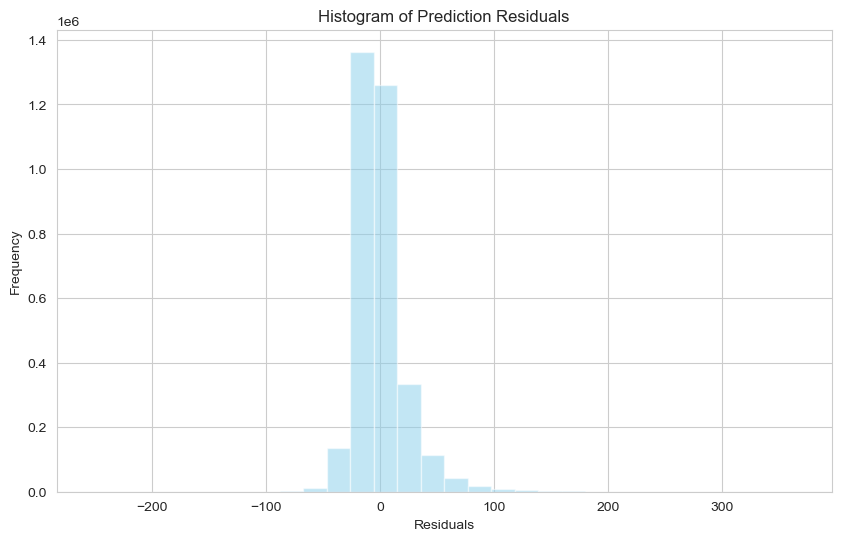

In [64]:
plot_residuals_histogram(best_rf_regressor, residuals_rf)

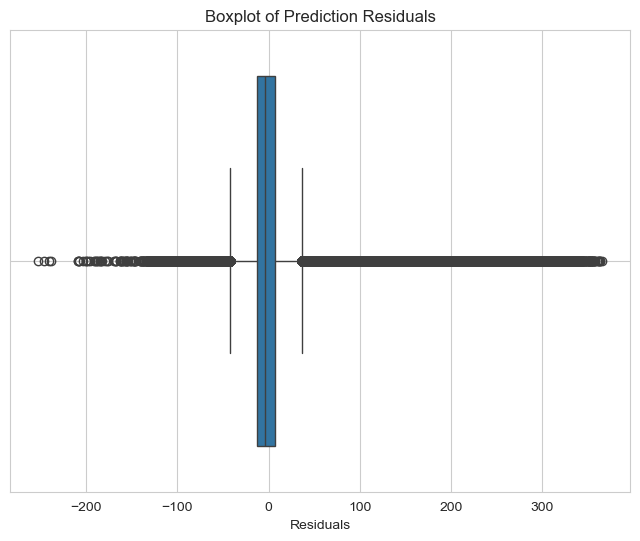

In [65]:
plot_residuals_boxplot(rf_regressor, residuals_rf)

In [77]:
feature_imporatnce = X_train.columns.tolist()
len(feature_imporatnce)

16

In [72]:
feature_imporatnce

['sta3n',
 'stopcode',
 'dta',
 'dts',
 'non_va',
 'zip',
 'state',
 'NoShow',
 'discontinued',
 'typecare',
 'day_of_week',
 'day_of_month',
 'month',
 'hour',
 'prior_noShow_rate',
 'prior_service_time_avg']

In [109]:
def plot_feature_importances(model, feature_names, title ,top_n=15):
    """
    Plot the top n feature importances of the given model.

    Args:
        model: The trained model, e.g., an instance of RandomForestRegressor or XGBRegressor.
        feature_names (list): A list of names corresponding to the features in the training data.
        top_n (int): The number of top features to display.
    """
    # Extract feature importances from the model
    importances = model.feature_importances_

    # Create a DataFrame for easier handling
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

    # Sort features according to importance
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)

    # Select top n features
    feature_importances = feature_importances.head(top_n)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importances)
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [29]:
X_test_ = pd.read_csv('data_st/X_test.csv')

In [30]:
feature_names = X_test_.columns.tolist()

In [31]:
feature_names

['sta3n',
 'stopcode',
 'dta',
 'dts',
 'non_va',
 'zip',
 'state',
 'discontinued',
 'typecare',
 'day_of_week',
 'day_of_month',
 'month',
 'hour',
 'prior_noShow_rate',
 'prior_service_time_avg']

In [18]:
title_rf = "Random Forest"

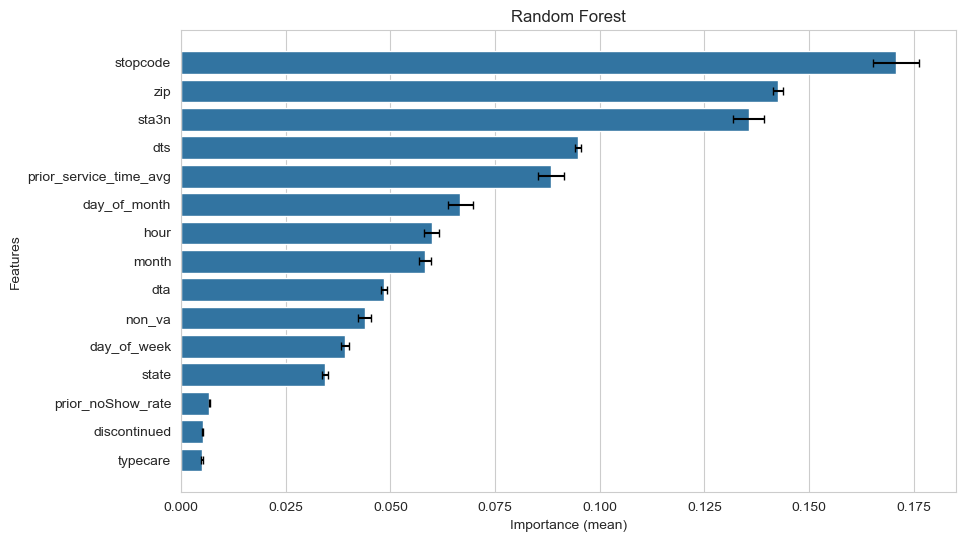

In [27]:
plot_feature_importances_bootstrap(best_rf_regressor, X_train, y_train, feature_name, title_rf, top_n=16, n_iterations=2)

<a name="4.2"></a>
###  4.2 - XGBoosting Regressor

<a name="4.2.1"></a>
### 4.2.1 - Training model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Chargement du modèle
from joblib import load
best_xgb_model = load('best_xgb_model_v7.joblib')
print("Paramètres du modèle de modele_rf_regressor:")
print(best_xgb_model.get_params())

Paramètres du modèle de modele_rf_regressor:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.3, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 15, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 1000, 'n_jobs': 2, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'alpha': 10, 'random_stae': 0}


In [37]:
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, alpha = 10, random_stae = 0, n_jobs = 2)

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 15],
    'n_estimators': [10, 1000],
    'learning_rate': [0.05, 0.1]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=4)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 1000}
Lowest RMSE found:  22.639993120022787


In [40]:
best_xgb_model = grid_search.best_estimator_

In [41]:
from joblib import dump
dump(best_xgb_model, 'best_xgb_model_v7.joblib')
print("Modèle enregistré avec succès.")

Modèle enregistré avec succès.


<a name="4.2.2"></a>
### 4.2.2 - Evaluation

In [7]:
# Predict on the training set and the test set
y_pred_xgb_train = best_xgb_model.predict(X_train)
y_pred_xgb_test = best_xgb_model.predict(X_test)

In [44]:
# Now call the function with actual and predicted values
evaluate_model_performance(y_train, y_pred_xgb_train, y_test,y_pred_xgb_test)

Training Metrics:
R-squared: 0.4009519805266253
Mean Absolute Error (MAE): 13.054066632333233
Mean Squared Error (MSE): 381.31281311416893
Root Mean Squared Error (RMSE): 19.52723260255198
Mean Absolute Percentage Error (MAPE): 4056857127583178.0

Testing Metrics:
R-squared: 0.21119723979349647
Mean Absolute Error (MAE): 14.936986722727726
Mean Squared Error (MSE): 501.1775958807869
Root Mean Squared Error (RMSE): 22.386996133487557
Mean Absolute Percentage Error (MAPE): 4681402106769810.0


In [45]:
# Si y_test est un DataFrame, assurez-vous que y_pred_xgb_test a la même forme
if isinstance(y_test, pd.DataFrame):
    y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test, index=y_test.index, columns=y_test.columns)
elif isinstance(y_test, pd.Series):
    y_pred_xgb_test = pd.Series(y_pred_xgb_test, index=y_test.index)

if isinstance(residuals_xgb, pd.DataFrame):
    residuals_xgb = residuals_xgb.squeeze()

In [46]:
# calculate residuals
residuals_xgb = y_test - y_pred_xgb_test

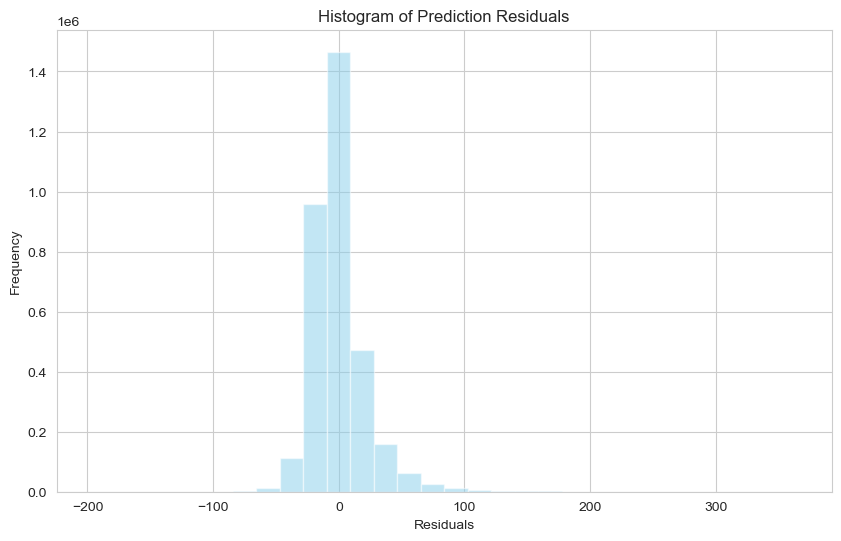

In [47]:
plot_residuals_histogram(best_xgb_model, residuals_xgb)

In [51]:
residuals_xgb.shape

(3297073, 1)

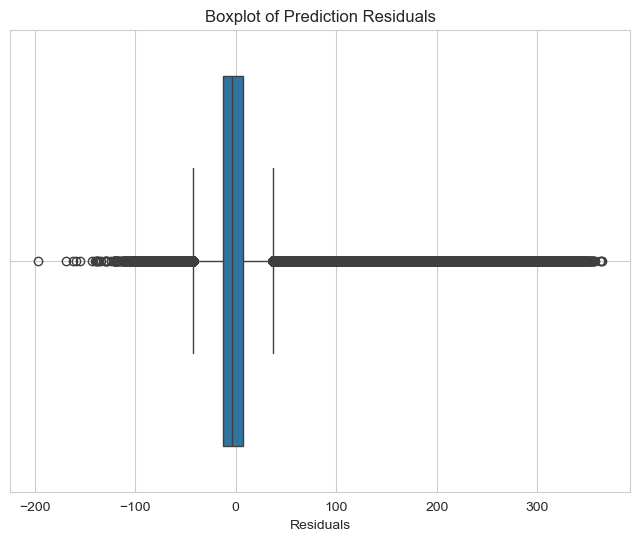

In [56]:
plot_residuals_boxplot(best_xgb_model, residuals_xgb)

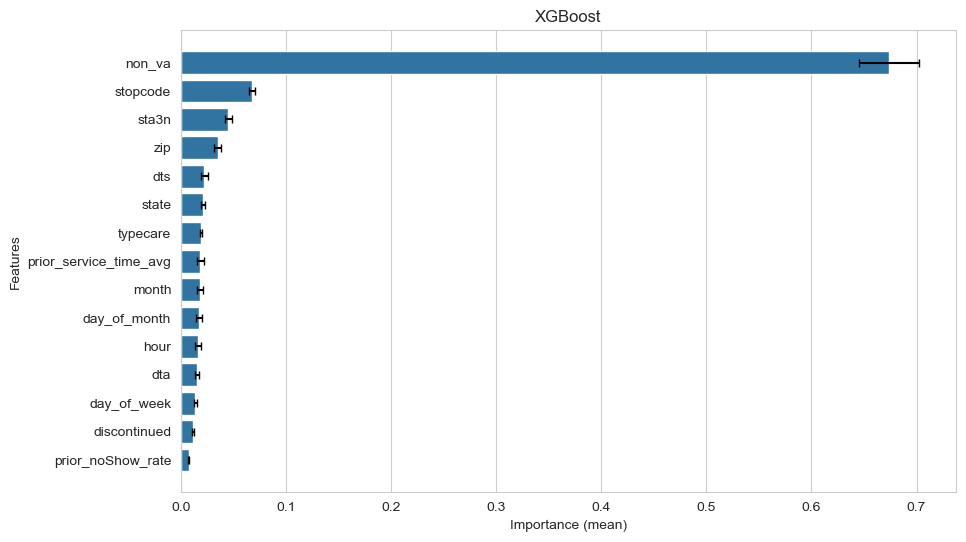

In [18]:
plot_feature_importances_bootstrap(best_xgb_model, X_train, y_train, feature_name, 'XGBoost', top_n=16, n_iterations=2)

<a name="4.3"></a>
###  4.3 - AdaBoosting

<a name="4.3.1"></a>
### 4.3.1 - Training model

In [5]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [23]:
# Chargement du modèle
from joblib import load
ada_reg = load('ada_model_st_v5.joblib')
print("Paramètres du modèle de ada_reg:")
print(ada_reg.get_params())

Paramètres du modèle de ada_reg:
{'estimator': None, 'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100, 'random_state': 0}


In [6]:
# Initialize AdaBoost with the DecisionTreeRegressor as the base estimator
ada_reg = AdaBoostRegressor(n_estimators=50, random_state=0)

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.005, 0.01],
    'loss': ['linear', 'square', 'exponential']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=ada_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs = -1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found:  {'learning_rate': 0.005, 'loss': 'square'}
Lowest RMSE found:  24.715835235763134


In [8]:
ada_reg = grid_search.best_estimator_

In [9]:
from joblib import dump
dump(ada_reg, 'ada_model_st_v6.joblib')
print("Modèle enregistré avec succès.")

Modèle enregistré avec succès.


In [10]:
title_ada = "Adaboost"

In [36]:
# Predict on the training set and the test set
y_pred_ada_train = ada_reg.predict(X_train)
y_pred_ada_test = ada_reg.predict(X_test)

In [ ]:
X_train

<a name="4.3.1"></a>
### 4.3.2 - Evaluation

In [12]:
def evaluate_model_performance_test(y_test, y_pred_test):
    # Calculate metrics for the test set
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

    print("Testing Metrics:")
    print(f"R-squared: {r2_test}")
    print(f"Mean Absolute Error (MAE): {mae_test}")
    print(f"Mean Squared Error (MSE): {mse_test}")
    print(f"Root Mean Squared Error (RMSE): {rmse_test}")
    


In [13]:
# Now call the function with actual and predicted values
evaluate_model_performance_test(y_test, y_pred_ada_test)

Testing Metrics:
R-squared: 0.040284880749194785
Mean Absolute Error (MAE): 16.886433913626014
Mean Squared Error (MSE): 609.7693117486579
Root Mean Squared Error (RMSE): 24.69350748169765


In [21]:
# Si y_test est un DataFrame, assurez-vous que y_pred_xgb_test a la même forme
if isinstance(y_test, pd.DataFrame):
    y_pred_ada_test = pd.DataFrame(y_pred_ada_test, index=y_test.index, columns=y_test.columns)
elif isinstance(y_test, pd.Series):
    y_pred_ada_test = pd.Series(y_pred_ada_test, index=y_test.index)

In [16]:
# calculate residuals
residuals_ada = y_test - y_pred_ada_test

In [23]:
if isinstance(residuals_ada, pd.DataFrame):
    residuals_ada = residuals_ada.squeeze()

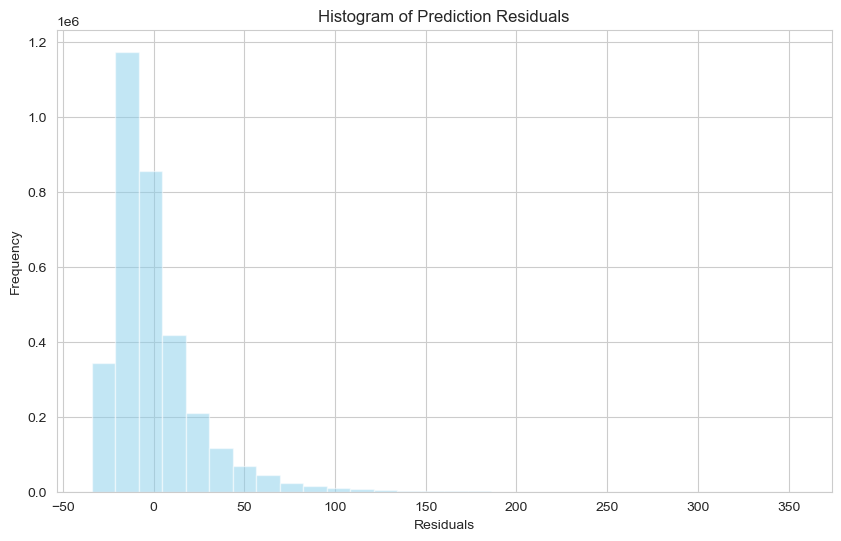

In [22]:
plot_residuals_histogram(ada_reg, residuals_ada)

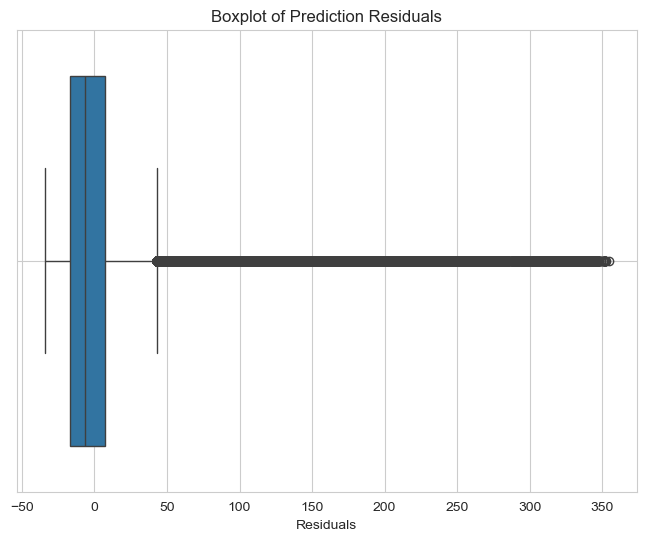

In [24]:
plot_residuals_boxplot(ada_reg, residuals_ada)

In [ ]:
feature_names = X_train.columns.tolist()
len(feature_names)

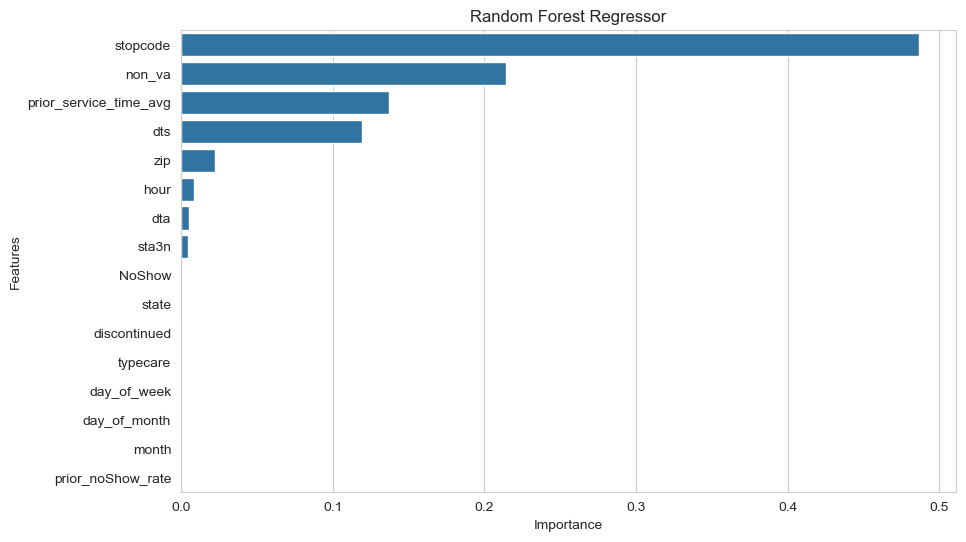

In [45]:
plot_feature_importances(ada_reg, feature_names, "Random Forest Regressor" , top_n=16)

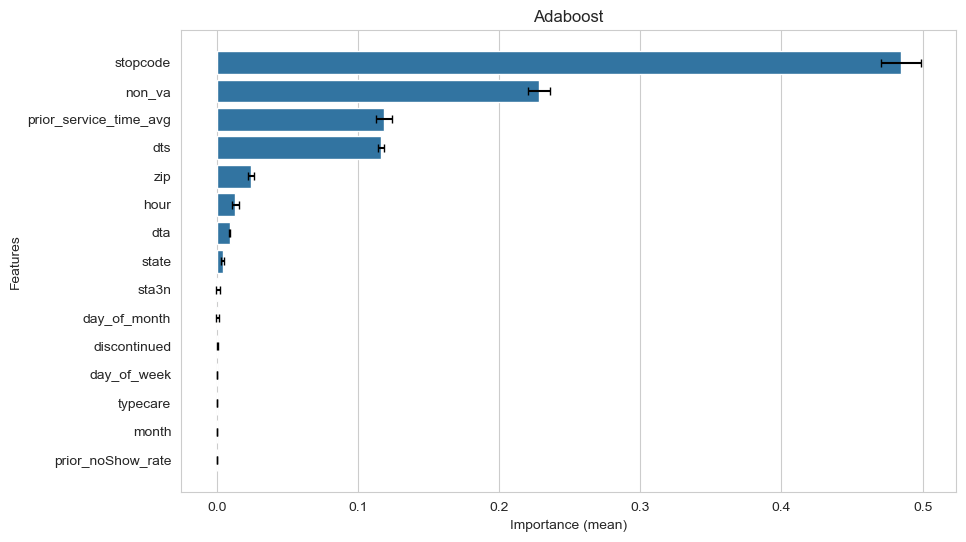

In [21]:
plot_feature_importances_bootstrap(ada_reg, X_train, y_train, feature_name, title_ada, top_n=16, n_iterations=2)

<a name="4.4"></a>
###  4.4 - ANN (MLP)

Voir fichier "Prediction_Service_Time_Complement" 

## ANNEXE

### Mean Absolute Error (MAE)

**Concept:**
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

**Utility:**
MAE is particularly useful when you need a robust measure that can provide error magnitudes that are directly interpretable in the same units as the data.

**Mathematical Formula:**
$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i| $$

### R-squared (Coefficient of Determination)

**Concept:**
R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's predicted from the independent variables. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, relative to the mean of the dependent variable.

**Utility:**
R-squared values range from 0 to 1, where a higher value generally indicates a better fit to the data provided. A model with a high R-squared value is capable of better capturing the variance in the input data.

**Mathematical Formula:**
$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$
Where:
- \( y_i \) is the actual value,
- \( \hat{y}_i \) is the predicted value,
- \( \bar{y} \) is the mean of the actual values.


### Mean Squared Error (MSE)

**Concept:**
MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

**Utility:**
MSE is very useful when large errors are particularly undesirable. It is more sensitive to outliers than MAE as it squares the differences.

**Mathematical Formula:**
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$


### Root Mean Squared Error (RMSE)

**Concept:**
RMSE is the square root of the mean of the square of all of the error. RMSE is very similar to MSE, but RMSE is more interpretable in the same units as the response variable.

**Utility:**
Like MSE, RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. Being in the same units as the response variable makes it easier for interpretation than MSE.

**Mathematical Formula:**
$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$





<a name="5"></a>
### 4.1 - Serie Temporelle 

hypothèses : 
-  $y_{t+1} = f(y_t, y_{t-1}, \ldots)$, avec y : time service et t:date_activitity et y depends on X(features)
-  Complexes and Non linear relationships between y and X (features)
